### EDA and ML Pipeline

### Import 

In [1]:
import os
import pandas as pd
os.getcwd()

'/'

In [2]:
""""
import subprocess
from pathlib import Path
import pandas as pd

try:
    repo_root = subprocess.run(
        ["git", "rev-parse", "--show-toplevel"],
        capture_output=True,
        text=True,
        check=True
    ).stdout.strip()
except subprocess.CalledProcessError:
    repo_root = Path.cwd()  # fallback if not in a git repo

csv_path = Path(repo_root) / "FullSimDF.csv"
dog_dat = pd.read_csv(csv_path)

"""

'"\nimport subprocess\nfrom pathlib import Path\nimport pandas as pd\n\ntry:\n    repo_root = subprocess.run(\n        ["git", "rev-parse", "--show-toplevel"],\n        capture_output=True,\n        text=True,\n        check=True\n    ).stdout.strip()\nexcept subprocess.CalledProcessError:\n    repo_root = Path.cwd()  # fallback if not in a git repo\n\ncsv_path = Path(repo_root) / "FullSimDF.csv"\ndog_dat = pd.read_csv(csv_path)\n\n'

In [2]:
dog_dat = pd.read_csv("/Users/ellawileman/Documents/fall2025/VIPR/CoolDawgs_PersonalizationGrp/FullSimDF.csv")
dog_dat.head()

,Breed,Age,Weight,Gender,Color,Coat Length,Coat Type,is_brachycephalic,Energy Level,Playfulness Level,...,Hum_Diff,CBT_simulated,is_old,is_overweight,heat_stress_risk,High_humidity_fordogs,prior_heat_related_injury_est,simulated_heat_injury_flag,target2Category,target3Category
0,Yorkshire Terrier,9.6,25.3,Male,Tricolor,Long,Silky,0.0,3.543823,1.930809,...,12.99,40.511511,0,0,0,1,0.002,0,1,Heat Stress
1,Poodle,4.3,43.6,Female,Gray,Long,Curly,0.0,2.856352,1.334560,...,11.75,38.406988,0,1,1,1,0.052,0,0,Normal
2,French Bulldog,3.5,33.3,Male,Cream,Short,Smooth,1.0,3.588762,4.748225,...,2.55,39.389887,0,0,1,0,0.052,0,0,Normal
3,Pembroke Welsh Corgi,6.4,49.6,Female,Cream,Short,Double,0.0,3.507116,4.176902,...,3.26,38.831824,0,1,1,0,0.052,0,0,Normal
4,Weimaraner,3.0,59.7,Male,Brown,Short,Smooth,0.0,3.832747,3.935919,...,3.96,39.439888,0,1,1,0,0.052,0,0,Normal


In [3]:
# column names
dog_dat.columns

Index(['Breed', 'Age', 'Weight', 'Gender', 'Color', 'Coat Length', 'Coat Type',
       'is_brachycephalic', 'Energy Level', 'Playfulness Level',
       'size_category', 'Spayed/Neutered', 'Indoor/Outdoor', 'Season',
       'Sun Exposure', 'Wind Cooling Effect', 'Station_Temp',
       'Station_Humidity', 'Ambient_Temp', 'Ambient_Humidity', 'T_device',
       'H_device', 'breed_wt_mu', 'breed_wt_sd', 'ideal_weight',
       'pct_of_ideal', 'BCS_cont', 'BCS', 'Temp_Diff', 'Hum_Diff',
       'CBT_simulated', 'is_old', 'is_overweight', 'heat_stress_risk',
       'High_humidity_fordogs', 'prior_heat_related_injury_est',
       'simulated_heat_injury_flag', 'target2Category', 'target3Category'],
      dtype='object')

## EDA

In [5]:
import matplotlib.pyplot as plt

### Univariate

(array([3.000e+00, 3.000e+00, 9.000e+00, 5.800e+01, 1.490e+02, 2.530e+02,
        5.840e+02, 8.620e+02, 1.234e+03, 1.431e+03, 1.512e+03, 1.287e+03,
        9.330e+02, 5.660e+02, 2.940e+02, 1.200e+02, 4.600e+01, 1.700e+01,
        4.000e+00, 1.000e+00]),
 array([-8.9 , -7.27, -5.64, -4.01, -2.38, -0.75,  0.88,  2.51,  4.14,
         5.77,  7.4 ,  9.03, 10.66, 12.29, 13.92, 15.55, 17.18, 18.81,
        20.44, 22.07, 23.7 ]),
 <BarContainer object of 20 artists>)

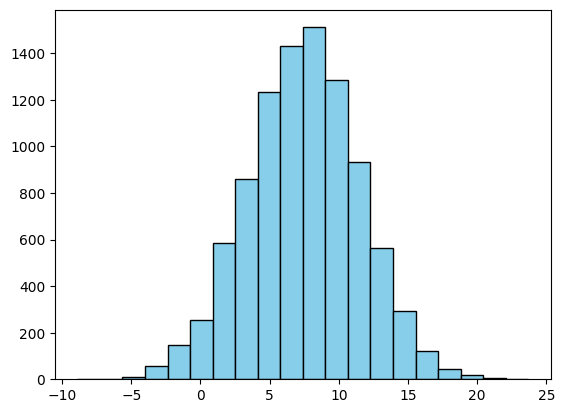

In [6]:
# Ella
plt.hist(dog_dat['Age'], bins=20, color='skyblue', edgecolor='black')
# Age is normally distributed about 7 years

### Bivariate

/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_21832/2035708879.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=cats, patch_artist=True)


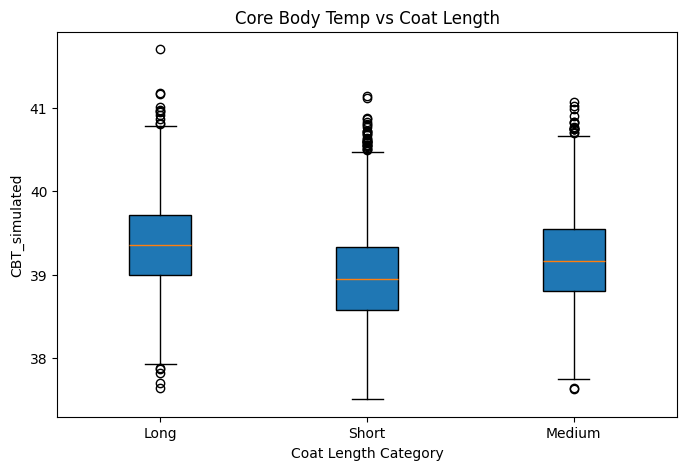

In [7]:
# Ella
cats = dog_dat['Coat Length'].unique()

# Create a list of CBT_simulated arrays, one per coat length category
data = [dog_dat.loc[dog_dat['Coat Length'] == c, 'CBT_simulated'] for c in cats]

plt.figure(figsize=(8,5))
plt.boxplot(data, labels=cats, patch_artist=True)
plt.ylabel("CBT_simulated")
plt.xlabel("Coat Length Category")
plt.title("Core Body Temp vs Coat Length")
plt.show()# No clear correlation between coat length and CBT, looks like short and medium tend to have slightly lower 
# minimums of CBT but not by much

### Model-Agnostic Feature Selection

In [8]:
# Correlation Filtering? 

## Predicting CBT and "Heat Stress" Label

In [9]:
dog_dat['target3Category'].value_counts()

target3Category
Normal         8295
Heat Stress    1026
Heat Stroke      45
Name: count, dtype: int64

In [3]:
# Drop the target columns from X, and core body temp
X = dog_dat.drop(columns=['target2Category', 'target3Category', 'CBT_simulated'])
# Assume X is your feature set without targets
numeric_features = X.select_dtypes(include=['int64', 'float64'])
categorical_features = X.select_dtypes(include=['object', 'category'])
# One-hot encode categorical features
X_cat_encoded = pd.get_dummies(categorical_features, drop_first=True)
X_encoded = pd.concat([numeric_features, X_cat_encoded], axis=1)




# Binary target
y2 = dog_dat['target2Category']
label_map_binary = {"Normal": 0, "Heat Stress": 1}
y2_num = y2.map(label_map_binary)

# 3-class target
y3 = dog_dat['target3Category']
ordered_levels = ["Normal", "Heat Stress", "Heat Stroke"]
y3_cat = pd.Categorical(y3, categories=ordered_levels, ordered=True)
label_map_3class = {"Normal": 0, "Heat Stress": 1, "Heat Stroke": 2}
y3_num = y3.map(label_map_3class)

y_cbt = dog_dat['CBT_simulated']


#### Train test split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, _, _ = train_test_split(
    X_encoded, y2, test_size=0.2, random_state=42, stratify=y2
) # split samples once

y_train_2class = y2.loc[X_train.index]
y_test_2class = y2.loc[X_test.index]

y_train_3class = y3_num.loc[X_train.index]
y_test_3class = y3_num.loc[X_test.index]

y_train_continuous = y_cbt.loc[X_train.index]
y_test_continuous = y_cbt.loc[X_test.index]

### Testing Regression Models 

In [5]:
#reused smote data 
from imblearn.over_sampling import SMOTE
import numpy as np
smote = SMOTE(random_state=42)
X2_train_res, y2_train_res = smote.fit_resample(X_train, y_train_2class)


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X2_train_res)
X_test_scaled = scaler.transform(X_test)

#### 2-Class Linear Regression

In [ ]:
# Sydney

#linear with 2 class


linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train_scaled, y2_train_res)
linearPredictions = linearRegressionModel.predict(X_test_scaled)
#threshold since this isnt a classifier and prediction is 0 or 1
binary_preds = [1 if x >= 0.3 else 0 for x in linearPredictions]
print(classification_report(y_test_2class, binary_preds))

#### 2-Class Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Fit  SMOTE-balanced training data
gb_reg.fit(X_train_scaled, y2_train_res)

#  continuous risk scores
gb_raw = gb_reg.predict(X_test_scaled)

# apply threshold
gb_preds = np.where(gb_raw >= 0.3, 1, 0)

print(classification_report(y_test_2class, gb_preds))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1630
           1       0.33      0.63      0.43       237

    accuracy                           0.79      1867
   macro avg       0.63      0.72      0.65      1867
weighted avg       0.86      0.79      0.82      1867



#### 2-Class Elastic Net Regressor

In [ ]:
from sklearn.linear_model import ElasticNet

#smaller alpha as a penalty
en_model = ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=42)
en_model.fit(X_train_scaled, y2_train_res)

#predictions without any classifying
en_raw = en_model.predict(X_test_scaled)

#apply the threshold to get 0s and 1s
en_preds = np.where(en_raw >= 0.25, 1, 0)

#report
print(classification_report(y_test_2class, en_preds))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1630
           1       0.40      0.61      0.48       237

    accuracy                           0.84      1867
   macro avg       0.67      0.74      0.69      1867
weighted avg       0.87      0.84      0.85      1867



#### 2-Class Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_reg.fit(X_train_scaled, y2_train_res)

# get continuous predictions
dt_raw = dt_reg.predict(X_test_scaled)

# lower threshold to improve recall
dt_preds = np.where(dt_raw >= 0.3, 1, 0)
print(classification_report(y_test_2class, dt_preds))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1630
           1       0.30      0.65      0.41       237

    accuracy                           0.76      1867
   macro avg       0.62      0.72      0.63      1867
weighted avg       0.86      0.76      0.80      1867



#### 2-Class MLP Regressor (Neural Network)

In [ ]:
from sklearn.neural_network import MLPRegressor

# hidden_layer_sizes=(100, 50) means two layers of neurons
mlp_reg = MLPRegressor(hidden_layer_sizes=(100, 100, 100), 
                       activation='relu',  
                       random_state=42)

# fit model
mlp_reg.fit(X_train_scaled, y2_train_res)

# raw predictions (continuous values)
mlp_raw = mlp_reg.predict(X_test_scaled)

# thresholding logic we discussed - using 0.3 here to help boost Class 1 Recall
mlp_preds = np.where(mlp_raw >= 0.3, 1, 0)
print(classification_report(y_test_2class, mlp_preds))

              precision    recall  f1-score   support

           0       0.92      0.81      0.87      1630
           1       0.30      0.54      0.39       237

    accuracy                           0.78      1867
   macro avg       0.61      0.68      0.63      1867
weighted avg       0.85      0.78      0.81      1867



#### 2-Class Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=300, max_depth=6, random_state=42)

#fit data
rf_reg.fit(X_train_scaled, y2_train_res)

# untouched raw data from model
rf_raw = rf_reg.predict(X_test_scaled)

# apply the threshold - 0.3 to classify more Class 1 (Heat Stress) cases
rf_preds = np.where(rf_raw >= 0.3, 1, 0)

print(classification_report(y_test_2class, rf_preds))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1630
           1       0.31      0.72      0.44       237

    accuracy                           0.76      1867
   macro avg       0.63      0.75      0.64      1867
weighted avg       0.87      0.76      0.80      1867



#### 2-Class Support Vector Regression

In [ ]:
from sklearn.svm import SVR

#SVR with RBF kernel (non-linear relationships)
svr_reg = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# fit and predicitions collected
svr_reg.fit(X_train_scaled, y2_train_res)
svr_raw = svr_reg.predict(X_test_scaled)

# threshold (0.3 is a good starting point for safety)
svr_preds = np.where(svr_raw >= 0.3, 1, 0)

print(classification_report(y_test_2class, svr_preds))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1630
           1       0.46      0.39      0.42       237

    accuracy                           0.86      1867
   macro avg       0.69      0.66      0.67      1867
weighted avg       0.86      0.86      0.86      1867



### 3-Class Random Forest Regression

In [ ]:
#3 class

# reused SMOTE with 3 classes (training only)
smote3 = SMOTE(random_state=42, sampling_strategy='not majority' )
X3_train_res, y3_train_res = smote3.fit_resample(X_train, y_train_3class)

X_train3_scaled = scaler.fit_transform(X3_train_res)
X_test3_scaled = scaler.transform(X_test)

#Random Forest Regression model
rf_3class = RandomForestRegressor(n_estimators=300, max_depth=6, random_state=42)
rf_3class.fit(X_train3_scaled, y3_train_res) # Use your 3-class resampled labels

#  continuous predictions collected
rf_raw = rf_3class.predict(X_test3_scaled)

#  Double Threshold Logic -  < 0.3 is Normal, 0.3 to 1.5 is Stress, > 1.5 is Stroke
conditions = [
    (rf_raw < 0.3),
    (rf_raw >= 0.3) & (rf_raw < 1.5),
    (rf_raw >= 1.5)
]
choices = [0, 1, 2]
rf_preds_3class = np.select(conditions, choices)

print(classification_report(y_test_3class, rf_preds_3class))

              precision    recall  f1-score   support

           0       0.96      0.65      0.78      1630
           1       0.22      0.71      0.34       225
           2       0.12      0.42      0.19        12

    accuracy                           0.66      1867
   macro avg       0.43      0.59      0.43      1867
weighted avg       0.86      0.66      0.72      1867



### Using Binary Target Class (2-class)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X2_train_res, y2_train_res = smote.fit_resample(X_train, y_train_2class)
print("Original class distribution:\n", y_train_2class.value_counts())
print("After SMOTE:\n", y2_train_res.value_counts())

Original class distribution:
 target2Category
0    6521
1     947
Name: count, dtype: int64
After SMOTE:
 target2Category
0    6521
1    6521
Name: count, dtype: int64


### Using Three Class Target 

In [ ]:
# SMOTE with 3 classes (training only)
smote3 = SMOTE(random_state=42, sampling_strategy='not majority' )
X3_train_res, y3_train_res = smote3.fit_resample(X_train, y_train_3class)
print("Original class distribution:\n", y_train_3class.value_counts())
print("After SMOTE:\n", y3_train_res.value_counts())

Original class distribution:
 target3Category
0    6521
1     901
2      46
Name: count, dtype: int64
After SMOTE:
 target3Category
0    6521
1    6521
2    6521
Name: count, dtype: int64


In [ ]:
y_test_3class.value_counts()

target3Category
0    1630
1     225
2      12
Name: count, dtype: int64

Now we are ready to fit ML models below (Use 2-class training and testing or 3-class training and testing) 
-  If you want to use a BINARY CLASSIFIER MODEL: X2_train_res, X2_test, y2_train_res, y2_test
- If you want to use a MULTI-CLASS CLASSIFIER MODEL: X3_train_res, X3_test, y3_train_res, y3_test

**Basic Steps**
- 1. Fit model on training
- 2. Predict on testing
- 4. Choose most important features (above a threshold) for new subset of features
- 5. Retrain on only that subset
- 6. Grid search (not implemented yet) - for best combo of predictors
- 7. Predict on testing
- 8. Show classification report


In [ ]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

### 2-Class Target Classifiers

#### 2-Class XGBoost

In [ ]:
# Ella

# XGBOOST for 2-class target
from xgboost import XGBClassifier

# fit prelim model
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X2_train_res, y2_train_res)
y2_pred = xgb_model.predict(X_test)
# predict probabilities
y2_proba = xgb_model.predict_proba(X_test)

# step 4: permutation importance
# permutation importance works on any model type
# can apply same process to all classifiers

perm_importance = permutation_importance(xgb_model, X_test, y_test_2class, n_repeats=10, random_state=42, scoring = "recall")

# get permutation importance as dataframe
perm_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values(by='importance_mean', ascending=False)

print("Top 20 features by permutation importance:")
print(perm_df.head(30))

Top 20 features by permutation importance:
                        feature  importance_mean  importance_std
12                     T_device         0.114768        0.013581
10                 Ambient_Temp         0.094515        0.009473
20                    Temp_Diff         0.078903        0.010170
102               Season_Summer         0.065823        0.014146
21                     Hum_Diff         0.032489        0.007560
8                  Station_Temp         0.031646        0.007837
0                           Age         0.019831        0.014377
4             is_brachycephalic         0.013502        0.006751
13                     H_device         0.010970        0.006315
82                  Color_Merle         0.010549        0.003402
1                        Weight         0.010127        0.009089
29       Breed_Alaskan Malamute         0.010127        0.002799
89           Coat Length_Medium         0.009283        0.006201
18                     BCS_cont         0.00759

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'T_device'),
  Text(1, 0, 'Ambient_Temp'),
  Text(2, 0, 'Temp_Diff'),
  Text(3, 0, 'Season_Summer'),
  Text(4, 0, 'Hum_Diff'),
  Text(5, 0, 'Station_Temp'),
  Text(6, 0, 'Age'),
  Text(7, 0, 'is_brachycephalic'),
  Text(8, 0, 'H_device'),
  Text(9, 0, 'Color_Merle'),
  Text(10, 0, 'Weight'),
  Text(11, 0, 'Breed_Alaskan Malamute'),
  Text(12, 0, 'Coat Length_Medium'),
  Text(13, 0, 'BCS_cont'),
  Text(14, 0, 'pct_of_ideal'),
  Text(15, 0, 'Color_Tan'),
  Text(16, 0, 'Breed_Bulldog'),
  Text(17, 0, 'Breed_Lhasa Apso'),
  Text(18, 0, 'Breed_Poodle'),
  Text(19, 0, 'Color_Brindle')])

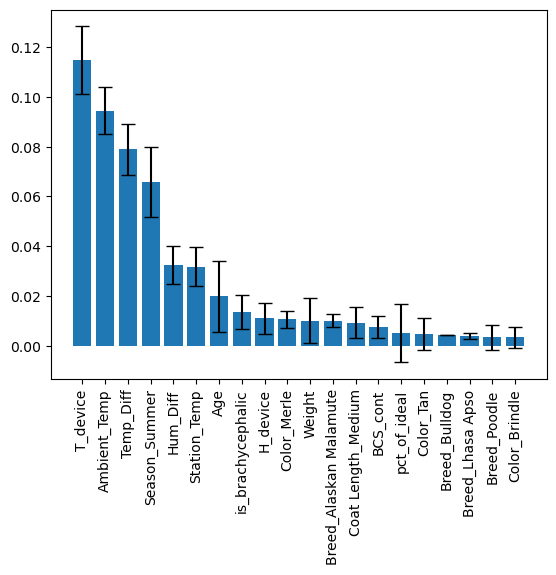

In [ ]:
plt.bar(perm_df['feature'][:20], perm_df['importance_mean'][:20], yerr=perm_df['importance_std'][:20], capsize=5)
plt.xticks(rotation=90)

In [ ]:
selected_features = perm_df[perm_df['importance_mean'] > 0]['feature'].tolist()
# could modify this to select features above some threshold instead

# Reduce training and test sets to selected features
X2_train_sel = X2_train_res[selected_features]
X2_test_sel = X_test[selected_features]

print(f"Number of features selected: {len(selected_features)}")

# Step 6: retrain on selected features

# ----------------------
# Add grid search here - optimize
# ----------------------

xgb_model_sel = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit model on selected features
xgb_model_sel.fit(X2_train_sel, y2_train_res)
y2_pred_sel = xgb_model_sel.predict(X2_test_sel)
y2_proba_sel = xgb_model_sel.predict_proba(X2_test_sel)

# classification report for evaluation
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report after feature selection:")
print(classification_report(y_test_2class, y2_pred_sel))
print("Confusion matrix:")
print(confusion_matrix(y_test_2class, y2_pred_sel))

Number of features selected: 34
Classification report after feature selection:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1630
           1       0.43      0.46      0.45       237

    accuracy                           0.85      1867
   macro avg       0.68      0.69      0.68      1867
weighted avg       0.86      0.85      0.86      1867

Confusion matrix:
[[1486  144]
 [ 127  110]]


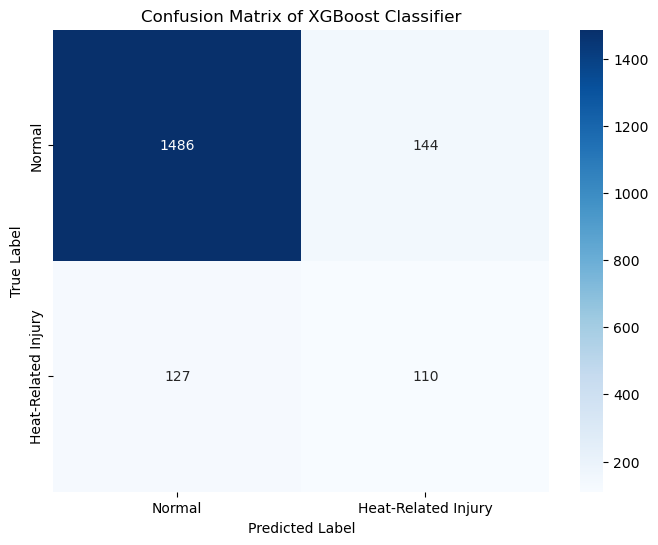

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test_2class, y2_pred_sel)
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Heat-Related Injury'], # Replace with your class labels
                yticklabels=['Normal', 'Heat-Related Injury']) # Replace with your class labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of XGBoost Classifier')
plt.show()

#### 2-Class LogReg Classifier

In [ ]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

'''
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X2_train_res, y2_train_res)


perm_importance = permutation_importance(logreg_model, X_test, y_test_2class, n_repeats=10, random_state=42, scoring = "recall")

perm_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values(by='importance_mean', ascending=False)

print("Top 20 features by permutation importance:")
print(perm_df.head(20))
'''

# Not sure if computationally feasible to do permutation importance for logistic regression

'\nlogreg_model = LogisticRegression(max_iter=1000, random_state=42)\nlogreg_model.fit(X2_train_res, y2_train_res)\n\n\nperm_importance = permutation_importance(logreg_model, X_test, y_test_2class, n_repeats=10, random_state=42, scoring = "recall")\n\nperm_df = pd.DataFrame({\n    \'feature\': X_test.columns,\n    \'importance_mean\': perm_importance.importances_mean,\n    \'importance_std\': perm_importance.importances_std\n}).sort_values(by=\'importance_mean\', ascending=False)\n\nprint("Top 20 features by permutation importance:")\nprint(perm_df.head(20))\n'

#### 2-Class Support Vector Classifier

In [11]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


lin_svm = LinearSVC(C=1)

lin_svm.fit(X2_train_res, y2_train_res)

y_pred_linear = lin_svm.predict(X_test)
print(classification_report(y_test_2class, y_pred_linear))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1660
           1       0.66      0.23      0.34       214

    accuracy                           0.90      1874
   macro avg       0.78      0.61      0.64      1874
weighted avg       0.88      0.90      0.88      1874



In [9]:
from sklearn.svm import SVC

rbf_svm = SVC(
    kernel='rbf',
    C=1,
    gamma='scale',
    probability=True
)

rbf_svm.fit(X2_train_res, y2_train_res)

y_pred_rbf = rbf_svm.predict(X_test)

In [12]:
print(classification_report(y_test_2class, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1660
           1       0.35      0.43      0.39       214

    accuracy                           0.84      1874
   macro avg       0.64      0.66      0.65      1874
weighted avg       0.86      0.84      0.85      1874



### 3-Class Target Classifiers

#### 3-Class XGBoost

In [ ]:
# Try on 3-class target
from xgboost import XGBClassifier

xgb_model_3 = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',   # IMPORTANT
    num_class=3,                  # IMPORTANT
    random_state=42
)
xgb_model_3.fit(X3_train_res, y3_train_res)
y3_pred = xgb_model_3.predict(X_test)

perm_importance_3 = permutation_importance(
    xgb_model_3, 
    X_test, 
    y_test_3class, 
    n_repeats=10, 
    random_state=42,
    scoring='accuracy'  # Can also use 'f1_weighted' for multi-class
)


In [ ]:
perm_df_3 = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': perm_importance_3.importances_mean,
    'importance_std': perm_importance_3.importances_std
}).sort_values(by='importance_mean', ascending=False)

print("Top 20 features by permutation importance (3-class):")
print(perm_df_3.head(20))

# Keep features with mean importance > 0
selected_features_3 = perm_df_3[perm_df_3['importance_mean'] > 0]['feature'].tolist()

# Reduce training and test sets to selected features
X3_train_sel = X3_train_res[selected_features_3]
X3_test_sel = X_test[selected_features_3]

print(f"Number of features selected (3-class): {len(selected_features_3)}")

### 
# ----------------------
# Add grid search here - optimize
# ----------------------

# Retrain on selected features
xgb_model_3_sel = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    num_class=3,
    random_state=42
)
xgb_model_3_sel.fit(X3_train_sel, y3_train_res)
y3_pred_sel = xgb_model_3_sel.predict(X3_test_sel)

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix (3-class):")
print(confusion_matrix(y_test_3class, y3_pred_sel))

Top 20 features by permutation importance (3-class):
                           feature  importance_mean  importance_std
102                  Season_Summer         0.045420        0.007371
101                  Season_Spring         0.028227        0.003405
91                Coat Type_Double         0.027531        0.002468
93                Coat Type_Smooth         0.016069        0.003223
89              Coat Length_Medium         0.013926        0.002088
90               Coat Length_Short         0.009855        0.002445
15                     breed_wt_sd         0.009695        0.002987
3                Playfulness Level         0.005838        0.001923
0                              Age         0.005624        0.001629
14                     breed_wt_mu         0.005624        0.002398
92                 Coat Type_Silky         0.004339        0.002025
2                     Energy Level         0.003910        0.001590
61                    Breed_Poodle         0.003803        0.00

In [ ]:
print("Classification report after feature selection (3-class):")
print(classification_report(y_test_3class, y3_pred_sel))

Classification report after feature selection (3-class):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1630
           1       0.55      0.27      0.36       225
           2       0.33      0.17      0.22        12

    accuracy                           0.88      1867
   macro avg       0.60      0.47      0.51      1867
weighted avg       0.86      0.88      0.86      1867



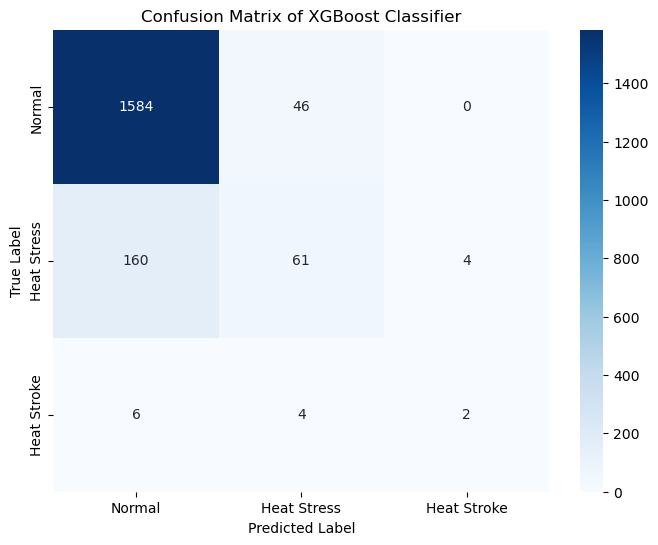

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test_3class, y3_pred_sel)
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Heat Stress', 'Heat Stroke'], # Replace with your class labels
                yticklabels=['Normal', 'Heat Stress', 'Heat Stroke']) # Replace with your class labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of XGBoost Classifier')
plt.show()


#### 3-Class SVM Classifier

In [ ]:
# Support Vector Machine Classifier


In [ ]:
# Comparing 3-class classifiers

In [ ]:
# Comparing 2 vs 3 class classifiers

### Continuous CBT Regressors